<a href="https://colab.research.google.com/github/dspierre/ConsoleApp2/blob/master/pr%C3%A9diction_de_fraude_%C3%A0_la_carte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
import itertools
import warnings
print("fait")

fait


In [ ]:
df = pd.read_csv("/content/sample_data/PS_20174392719_1491204439457_log.csv")
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
print(df.head(10))
df.head(10)

   step      type    amount  ... newBalanceDest  isFraud  isFlaggedFraud
0     1   PAYMENT   9839.64  ...           0.00      0.0             0.0
1     1   PAYMENT   1864.28  ...           0.00      0.0             0.0
2     1  TRANSFER    181.00  ...           0.00      1.0             0.0
3     1  CASH_OUT    181.00  ...           0.00      1.0             0.0
4     1   PAYMENT  11668.14  ...           0.00      0.0             0.0
5     1   PAYMENT   7817.71  ...           0.00      0.0             0.0
6     1   PAYMENT   7107.77  ...           0.00      0.0             0.0
7     1   PAYMENT   7861.64  ...           0.00      0.0             0.0
8     1   PAYMENT   4024.36  ...           0.00      0.0             0.0
9     1     DEBIT   5337.77  ...       40348.79      0.0             0.0

[10 rows x 11 columns]


,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


In [ ]:
print('Le dataframe cash pour la détection de fraude a {} lignes et colonnes'.format(df.shape))

Le dataframe cash pour la détection de fraude a (1536598, 11) lignes et colonnes


In [ ]:
print('Les colonnes de data',df.columns)

Les colonnes de data Index(['step', 'type', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df.shape

(1536598, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536598 entries, 0 to 1536597
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1536598 non-null  int64  
 1   type            1536598 non-null  object 
 2   amount          1536598 non-null  float64
 3   nameOrig        1536598 non-null  object 
 4   oldBalanceOrig  1536598 non-null  float64
 5   newBalanceOrig  1536598 non-null  float64
 6   nameDest        1536598 non-null  object 
 7   oldBalanceDest  1536598 non-null  float64
 8   newBalanceDest  1536598 non-null  float64
 9   isFraud         1536597 non-null  float64
 10  isFlaggedFraud  1536597 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 129.0+ MB


In [ ]:
df.describe

<bound method NDFrame.describe of          step      type     amount  ... newBalanceDest  isFraud  isFlaggedFraud
0           1   PAYMENT    9839.64  ...           0.00      0.0             0.0
1           1   PAYMENT    1864.28  ...           0.00      0.0             0.0
2           1  TRANSFER     181.00  ...           0.00      1.0             0.0
3           1  CASH_OUT     181.00  ...           0.00      1.0             0.0
4           1   PAYMENT   11668.14  ...           0.00      0.0             0.0
...       ...       ...        ...  ...            ...      ...             ...
1536593   154   CASH_IN   82840.29  ...      661986.07      0.0             0.0
1536594   154   CASH_IN   81967.00  ...    25841898.08      0.0             0.0
1536595   154   CASH_IN  126764.83  ...       52816.15      0.0             0.0
1536596   154   CASH_IN  138905.17  ...      109069.85      0.0             0.0
1536597   154   CASH_IN  182013.15  ...      104452.30      NaN             NaN

[1536

In [ ]:
df.isnull().values.any()

True

## datavisualisation 

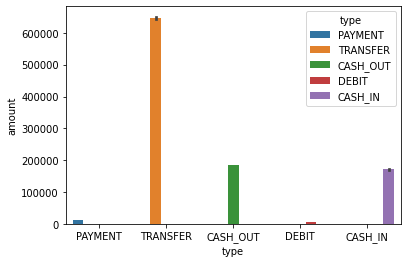

In [ ]:
ax = sns.barplot(x="type", y="amount", hue="type", data=df)

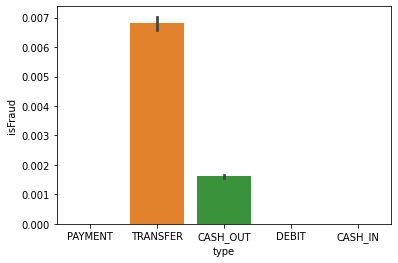

In [ ]:
ax = sns.barplot(x="type", y="isFraud", data=df, ci=68)

In [ ]:
(df.groupby('isFraud')['isFraud'].count()/df['isFraud'].count()) *100

isFraud
0.0    99.886112
1.0     0.113888
Name: isFraud, dtype: float64

In [ ]:
def plot_count(df, feature, title='', size=2):
    f, ax = plt.subplots(1,1, figsize=(3*size,2*size))
    total = float(len(df))
    sns.countplot(df[feature],order = df[feature].value_counts().index, palette='Set2')
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.4f}%'.format(100*height/total),
                ha="center") 
        ax.set_facecolor("ghostwhite")
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


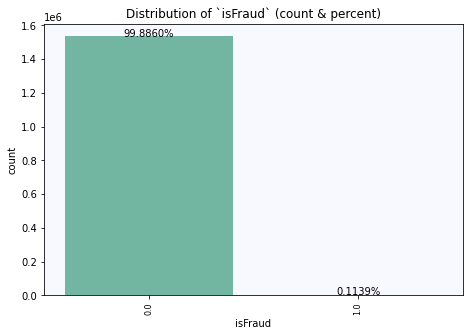

In [ ]:
plot_count(df, 'isFraud', 'Distribution of `isFraud` (count & percent)', size=2.5)

In [ ]:
df['isFlaggedFraud']==1

0          False
1          False
2          False
3          False
4          False
           ...  
1536593    False
1536594    False
1536595    False
1536596    False
1536597    False
Name: isFlaggedFraud, Length: 1536598, dtype: bool

In [ ]:
pd.crosstab(df['type'], df['isFraud'])

isFraud,0.0,1.0
type,,
CASH_IN,336529,0
CASH_OUT,544664,882
DEBIT,10426,0
PAYMENT,516738,0
TRANSFER,126490,868


Text(0.5, 1.0, 'Distribution de tipe de transation')

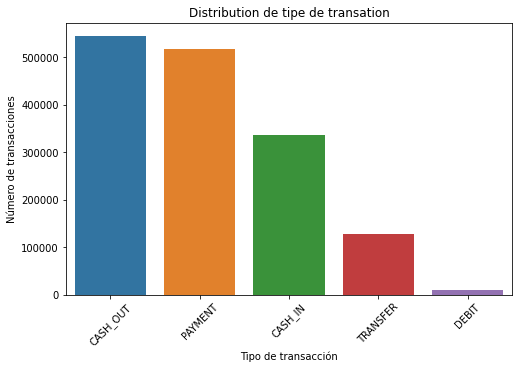

In [ ]:
# lo mismo plot.figure(figzize=(20,10)) y plot.rcParamns['figure.figsize'] = [20,10]
# plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='type', data=df, order=df['type'].value_counts().index)
plt.xticks(rotation= 45) # Rotación del texto en el eje x
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Distribution de tipe de transation')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


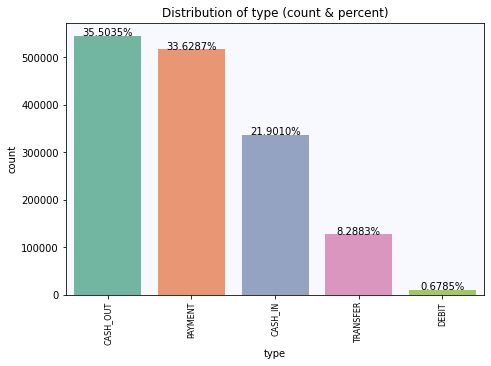

In [ ]:
plot_count(df, 'type', 'Distribution of type (count & percent)', size=2.5)

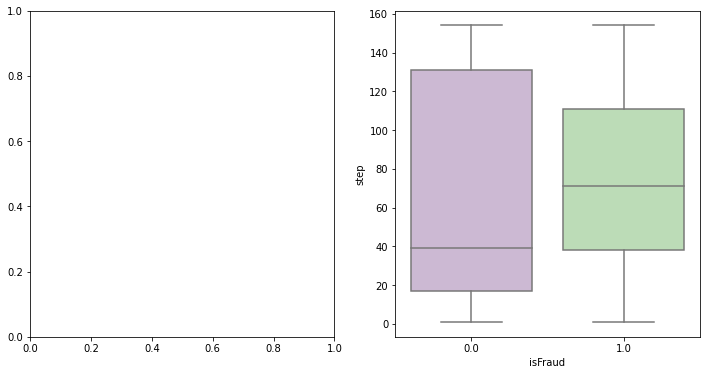

In [ ]:
fig, (ax1) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot( x="isFraud", y="step",data=df, palette="PRGn",showfliers=True)
plt.show()

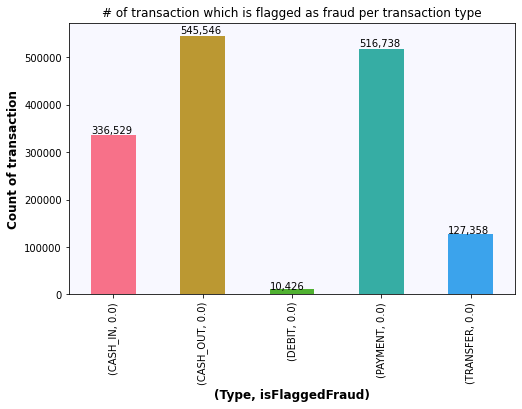

In [ ]:
df.groupby(['type', 'isFraud']).size()
ax = df.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar', color=sns.color_palette('husl'))
ax.set_title("# of transaction which is flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)", fontsize=12, fontweight = 'bold')
ax.set_ylabel("Count of transaction", fontsize=12, fontweight = 'bold')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
ax.set_facecolor("ghostwhite")

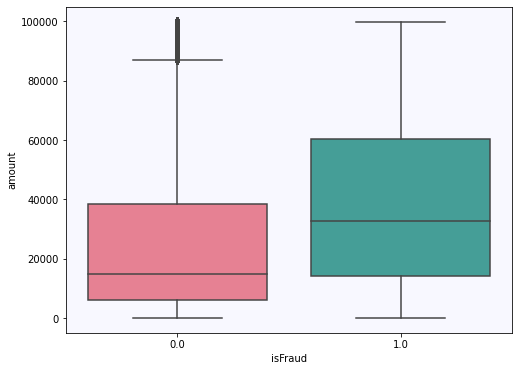

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'isFraud', y = 'amount', palette=("husl"), data = df[df.amount < 1e5]).set_facecolor("ghostwhite")
plt.show()

CASH_OUT    882
TRANSFER    868
Name: type, dtype: int64


Text(0.5, 1.0, 'Tipo de transacción cuando hay fraude')

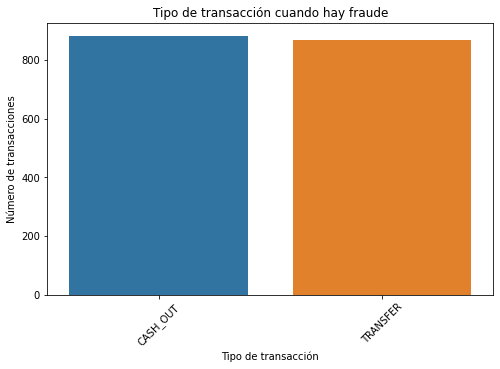

In [ ]:
print(df[(df['isFraud'] == 1)]['type'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df[(df['isFraud'] == 1)], order=df[(df['isFraud'] == 1)]['type'].value_counts().index)
plt.xticks(rotation= 45) # Rotación del texto en el eje x
plt.xlabel('Tipo de transacción')
plt.ylabel('Número de transacciones')
plt.title('Tipo de transacción cuando hay fraude')

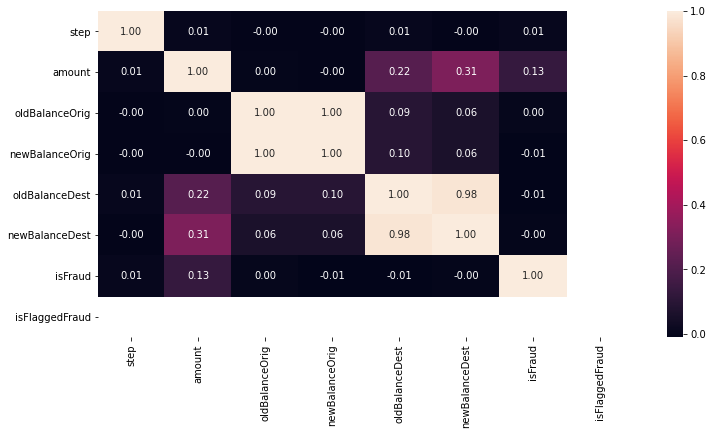

In [ ]:
# Explore correlations visually
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

## Etude du dataframe

In [ ]:
#print('\nAre there any merchants among originator accounts for CASH_IN \
#transactions? {}'.format((df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any())) 

In [ ]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
randomState = 5
np.random.seed(randomState)
Y = X['isFraud']
del X['isFraud']
# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) 
X

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2,1,0,181.00,181.0,0.0,0.00,0.00
3,1,1,181.00,181.0,0.0,21182.00,0.00
15,1,1,229133.94,15325.0,0.0,5083.00,51513.44
19,1,0,215310.30,705.0,0.0,22425.00,0.00
24,1,0,311685.89,10835.0,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...
1536560,154,1,366061.68,106129.0,0.0,0.00,366061.68
1536562,154,1,590255.13,119.0,0.0,1191765.86,1782020.99
1536563,154,1,411280.33,11764.0,0.0,1401006.64,1630990.87
1536566,154,1,236639.48,11388.0,0.0,646657.55,883297.03


In [ ]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldBalanceDest == 0) & \
(Xfraud.newBalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))
print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldBalanceDest == 0) & \
(XnonFraud.newBalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.48342857142857143

The fraction of genuine transactions with 'oldBalanceDest' = newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0018118047422797153


In [ ]:
X.loc[(X.oldBalanceDest == 0) & (X.newBalanceDest == 0) & (X.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1
X

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2,1,0,181.00,181.0,0.0,-1.00,-1.00
3,1,1,181.00,181.0,0.0,21182.00,0.00
15,1,1,229133.94,15325.0,0.0,5083.00,51513.44
19,1,0,215310.30,705.0,0.0,22425.00,0.00
24,1,0,311685.89,10835.0,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...
1536560,154,1,366061.68,106129.0,0.0,0.00,366061.68
1536562,154,1,590255.13,119.0,0.0,1191765.86,1782020.99
1536563,154,1,411280.33,11764.0,0.0,1401006.64,1630990.87
1536566,154,1,236639.48,11388.0,0.0,646657.55,883297.03


In [ ]:
X.loc[(X.oldBalanceOrig == 0) & (X.newBalanceOrig == 0) & (X.amount != 0),['oldBalanceOrig', 'newBalanceOrig']] = np.nan
X

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2,1,0,181.00,181.0,0.0,-1.00,-1.00
3,1,1,181.00,181.0,0.0,21182.00,0.00
15,1,1,229133.94,15325.0,0.0,5083.00,51513.44
19,1,0,215310.30,705.0,0.0,22425.00,0.00
24,1,0,311685.89,10835.0,0.0,6267.00,2719172.89
...,...,...,...,...,...,...,...
1536560,154,1,366061.68,106129.0,0.0,0.00,366061.68
1536562,154,1,590255.13,119.0,0.0,1191765.86,1782020.99
1536563,154,1,411280.33,11764.0,0.0,1401006.64,1630990.87
1536566,154,1,236639.48,11388.0,0.0,646657.55,883297.03


In [ ]:
X['errorBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['errorBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

In [ ]:
limit = len(X)
def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


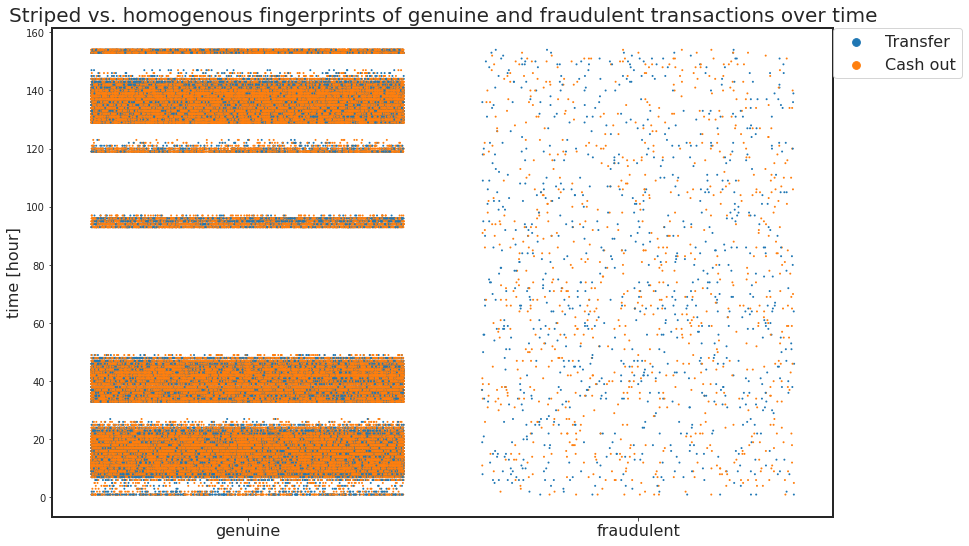

In [ ]:
ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


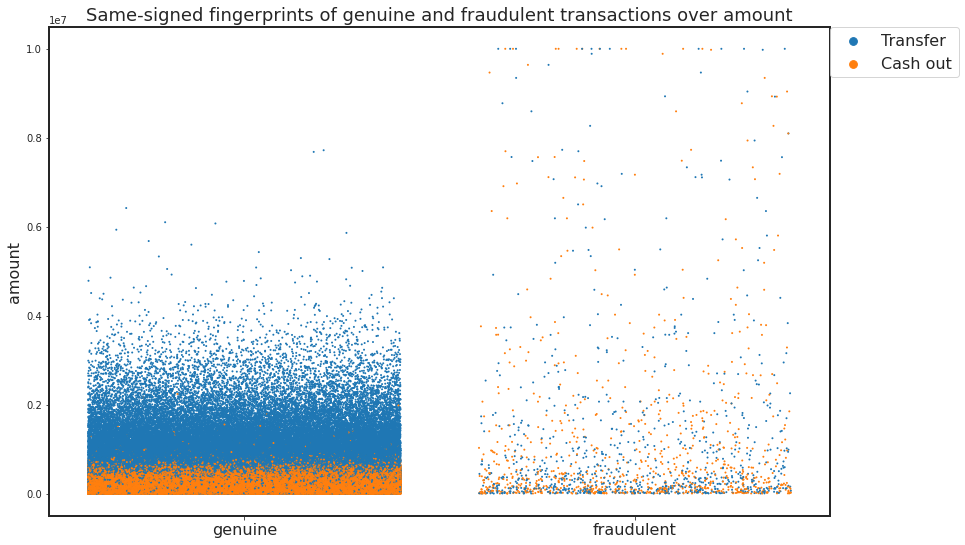

In [ ]:
limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('amount', size = 16)
ax.set_title('Same-signed fingerprints of genuine \
and fraudulent transactions over amount', size = 18);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


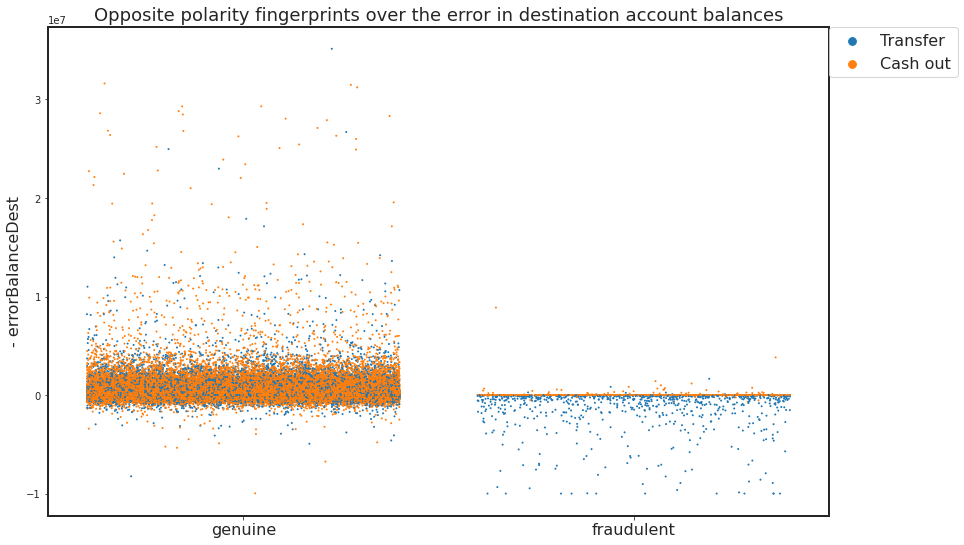

In [ ]:
limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('- errorBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the error in \
destination account balances', size = 18);

In [ ]:
print('skew = {}'.format( len(Xfraud) / float(len(X)) ))

skew = 0.002600668148799829


## dataprocessing 

In [ ]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
df = df.copy()
# Drop step, nameOrig, and isFlaggedFraud columns
df2 = df.drop(['step','nameOrig', 'isFlaggedFraud'], axis=1)
df2

,type,amount,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0.0
1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0.0
2,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00,1.0
3,CASH_OUT,181.00,181.00,0.00,C38997010,21182.00,0.00,1.0
4,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...
1536593,CASH_IN,82840.29,4954574.52,5037414.81,C944942446,744826.35,661986.07,0.0
1536594,CASH_IN,81967.00,5037414.81,5119381.81,C505864940,24347642.20,25841898.08,0.0
1536595,CASH_IN,126764.83,5119381.81,5246146.63,C1685073299,179580.98,52816.15,0.0
1536596,CASH_IN,138905.17,5246146.63,5385051.81,C1936665676,247975.02,109069.85,0.0


In [ ]:
y = df2['isFraud'].copy()
X = df2.drop('isFraud', axis=1).copy()
y

0          0.0
1          0.0
2          1.0
3          1.0
4          0.0
          ... 
1536593    0.0
1536594    0.0
1536595    0.0
1536596    0.0
1536597    NaN
Name: isFraud, Length: 1536598, dtype: float64

In [ ]:
X

,type,amount,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest
0,PAYMENT,9839.64,170136.00,160296.36,M1979787155,0.00,0.00
1,PAYMENT,1864.28,21249.00,19384.72,M2044282225,0.00,0.00
2,TRANSFER,181.00,181.00,0.00,C553264065,0.00,0.00
3,CASH_OUT,181.00,181.00,0.00,C38997010,21182.00,0.00
4,PAYMENT,11668.14,41554.00,29885.86,M1230701703,0.00,0.00
...,...,...,...,...,...,...,...
1536593,CASH_IN,82840.29,4954574.52,5037414.81,C944942446,744826.35,661986.07
1536594,CASH_IN,81967.00,5037414.81,5119381.81,C505864940,24347642.20,25841898.08
1536595,CASH_IN,126764.83,5119381.81,5246146.63,C1685073299,179580.98,52816.15
1536596,CASH_IN,138905.17,5246146.63,5385051.81,C1936665676,247975.02,109069.85


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [ ]:
df = df.copy()
# Drop step, nameOrig, and isFlaggedFraud columns
 # One-hot encode the type column
y = df['isFraud'].copy()
X = df.drop('isFraud', axis=1).copy()
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
 # Create a tokenizer and fit it to the customer data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train['nameDest'])
print("Total # of customers:", len(tokenizer.word_index))
# Create tokenized customer lists
customers_train = tokenizer.texts_to_sequences(X_train['nameDest'])
customers_test = tokenizer.texts_to_sequences(X_test['nameDest'])
customers_train = tf.keras.preprocessing.sequence.pad_sequences(customers_train, maxlen=1)
customers_test = tf.keras.preprocessing.sequence.pad_sequences(customers_test, maxlen=1)
# Drop nameDest column
X_train = X_train.drop('nameDest', axis=1)
X_test = X_test.drop('nameDest', axis=1)
# Scale X with a standard scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Total # of customers: 491423


In [ ]:
X_test

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,0.985175,4.700449,4.778475,0.571434,0.317102,1.888084,-0.741852,-0.082543,-0.711952,-0.300479
1,0.362036,0.095106,0.173280,0.584844,0.711351,1.888084,-0.741852,-0.082543,-0.711952,-0.300479
2,0.146136,-0.290535,-0.297503,-0.429887,-0.379611,-0.529638,1.347978,-0.082543,-0.711952,-0.300479
3,-0.589839,-0.294125,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479
4,4.253343,-0.294002,-0.297503,-0.189164,0.310773,-0.529638,-0.741852,-0.082543,-0.711952,3.328016
...,...,...,...,...,...,...,...,...,...,...
460975,-0.035750,-0.230378,-0.285073,-0.429887,-0.399991,-0.529638,1.347978,-0.082543,-0.711952,-0.300479
460976,-0.203099,3.648188,3.632225,-0.261435,-0.346148,1.888084,-0.741852,-0.082543,-0.711952,-0.300479
460977,-0.189714,-0.278161,-0.297503,-0.415487,-0.403473,-0.529638,1.347978,-0.082543,-0.711952,-0.300479
460978,0.551329,-0.263911,-0.297503,-0.429887,-0.366682,-0.529638,-0.741852,-0.082543,-0.711952,3.328016


In [ ]:
customers_train

array([[99394],
       [99395],
       [ 1808],
       ...,
       [ 1529],
       [74604],
       [37320]], dtype=int32)

In [ ]:
X_train

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER
0,-0.499547,-0.294125,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479
1,-0.504633,-0.294125,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479
2,0.141089,-0.294125,-0.297503,0.730137,0.729045,-0.529638,1.347978,-0.082543,-0.711952,-0.300479
3,-0.342486,-0.288679,-0.297503,-0.429887,-0.307801,-0.529638,1.347978,-0.082543,-0.711952,-0.300479
4,-0.560061,-0.260470,-0.267663,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479
...,...,...,...,...,...,...,...,...,...,...
1075613,-0.499412,-0.289218,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479
1075614,-0.358280,2.266570,2.253507,-0.330387,-0.394693,1.888084,-0.741852,-0.082543,-0.711952,-0.300479
1075615,-0.583344,-0.294125,-0.297503,-0.137150,-0.265838,-0.529638,1.347978,-0.082543,-0.711952,-0.300479
1075616,-0.095614,-0.283697,-0.297503,-0.429887,-0.378005,-0.529638,1.347978,-0.082543,-0.711952,-0.300479


In [ ]:
y_train

1219033    0.0
664430     0.0
574748     0.0
954281     0.0
1280294    0.0
          ... 
1241052    0.0
1066306    0.0
28030      0.0
277869     0.0
773630     0.0
Name: isFraud, Length: 1075618, dtype: float64

In [ ]:
y_test

983205     0.0
477635     0.0
265897     0.0
309762     0.0
794916     0.0
          ... 
890816     0.0
116444     0.0
1254962    0.0
796591     0.0
596015     0.0
Name: isFraud, Length: 460980, dtype: float64

In [ ]:
train_df = pd.concat([X_train, pd.Series(np.squeeze(customers_train), name='customer'), y_train.reset_index(drop=True)], axis=1)
train_df

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
0,-0.499547,-0.294125,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479,99394,0.0
1,-0.504633,-0.294125,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479,99395,0.0
2,0.141089,-0.294125,-0.297503,0.730137,0.729045,-0.529638,1.347978,-0.082543,-0.711952,-0.300479,1808,0.0
3,-0.342486,-0.288679,-0.297503,-0.429887,-0.307801,-0.529638,1.347978,-0.082543,-0.711952,-0.300479,79408,0.0
4,-0.560061,-0.260470,-0.267663,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479,99396,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075613,-0.499412,-0.289218,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,1.404590,-0.300479,491423,0.0
1075614,-0.358280,2.266570,2.253507,-0.330387,-0.394693,1.888084,-0.741852,-0.082543,-0.711952,-0.300479,79517,0.0
1075615,-0.583344,-0.294125,-0.297503,-0.137150,-0.265838,-0.529638,1.347978,-0.082543,-0.711952,-0.300479,1529,0.0
1075616,-0.095614,-0.283697,-0.297503,-0.429887,-0.378005,-0.529638,1.347978,-0.082543,-0.711952,-0.300479,74604,0.0


In [ ]:
train_df['isFraud'].value_counts()


0.0    1074388
1.0       1229
Name: isFraud, dtype: int64

In [ ]:
print("Number of examples to sample:", 34929 - 71)

Number of examples to sample: 34858


In [ ]:
oversampled_data = train_df.query("isFraud == 1").sample(34858, replace=True, random_state=123)
oversampled_data

,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,tp_CASH_IN,tp_CASH_OUT,tp_DEBIT,tp_PAYMENT,tp_TRANSFER,customer,isFraud
980597,0.200403,-0.221471,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,-0.711952,3.328016,456872,1.0
916724,5.082476,0.222831,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,-0.711952,3.328016,433508,1.0
111088,-0.572518,-0.291812,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,-0.711952,3.328016,83387,1.0
1006226,-0.478818,-0.283285,-0.297503,-0.036063,-0.073059,-0.529638,1.347978,-0.082543,-0.711952,-0.300479,64102,1.0
91343,30.105412,2.500089,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,-0.711952,3.328016,132611,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169848,9.435922,0.619024,-0.297503,-0.404901,0.685181,-0.529638,1.347978,-0.082543,-0.711952,-0.300479,50251,1.0
467908,17.671763,1.368542,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,-0.711952,3.328016,63871,1.0
32312,1.373008,-0.114756,-0.297503,-0.429887,-0.462982,-0.529638,-0.741852,-0.082543,-0.711952,3.328016,111032,1.0
461490,0.537753,-0.190770,-0.297503,-0.429887,-0.335731,-0.529638,1.347978,-0.082543,-0.711952,-0.300479,63828,1.0


In [ ]:
total = df['isFraud'].value_counts()[0] + df['isFraud'].value_counts()[1]
fraud = (df['isFraud'].value_counts()[1]/total) * 100
print('Porcentage ds operations frauduleuses:', fraud)

Porcentage ds operations frauduleuses: 0.1138880265938304


In [ ]:
df['isFraud'].value_counts()

0.0    1534847
1.0       1750
Name: isFraud, dtype: int64

In [ ]:
{column: len(df[column].unique()) for column in df.columns}

{'amount': 1459126,
 'isFraud': 3,
 'nameDest': 656588,
 'newBalanceDest': 715724,
 'newBalanceOrig': 673151,
 'oldBalanceDest': 884006,
 'oldBalanceOrig': 563646,
 'tp_CASH_IN': 2,
 'tp_CASH_OUT': 2,
 'tp_DEBIT': 2,
 'tp_PAYMENT': 2,
 'tp_TRANSFER': 2}

## modele  de  classification 

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_input (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
customer_input (InputLayer)     [(None, 1)]          0                                            
__________________________________________________________________________________________________
X_dense1 (Dense)                (None, 64)           704         X_input[0][0]                    
__________________________________________________________________________________________________
customer_embedding (Embedding)  (None, 1, 64)        68839552    customer_input[0][0]             
____________________________________________________________________________________________

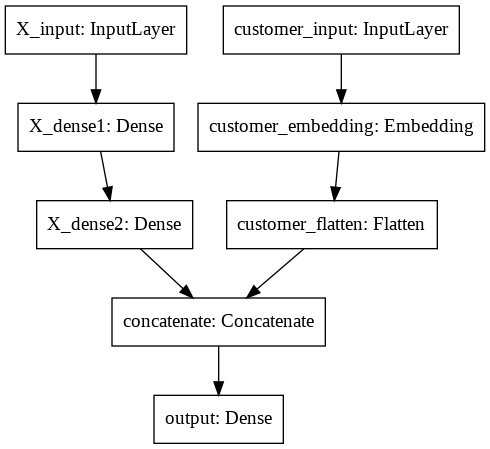

In [ ]:
# Inputs
X_inputs = tf.keras.Input(shape=(10,), name='X_input')
customer_inputs = tf.keras.Input(shape=(1,), name='customer_input')

# X
X_dense1 = tf.keras.layers.Dense(64, activation='relu', name='X_dense1')(X_inputs)
X_dense2 = tf.keras.layers.Dense(64, activation='relu', name='X_dense2')(X_dense1)

# customers
customer_embedding = tf.keras.layers.Embedding(
    input_dim=1075618,
    output_dim=64,
    input_length=1,
    name='customer_embedding'
)(customer_inputs)
customer_flatten = tf.keras.layers.Flatten(name='customer_flatten')(customer_embedding)

# Concatenate
concat = tf.keras.layers.concatenate([X_dense2, customer_flatten], name='concatenate')

# Output
outputs = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(concat)


model = tf.keras.Model(inputs=[X_inputs, customer_inputs], outputs=outputs)

print(model.summary())
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

In [ ]:
print(model)

In [ ]:
history = model.fit(
    [X_train, customers_train],
    y_train,
    validation_split=0.2,
    class_weight={
        0: 0.25,
        1: 4.0
    },
    batch_size=32,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
 5202/26891 [====>.........................] - ETA: 3:59:36 - loss: 0.0207 - accuracy: 0.9988 - auc: 0.8065

In [ ]:
results = model.evaluate([X_test, customers_test], y_test, verbose=0)
print("Test Accuracy: {:.3f}%".format(results[1] * 100))
print("     Test AUC: {:.3f}".format(results[2] * 100))

InvalidArgumentError: ignored

In [ ]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict([X_test, customers_test]))
y_pred = (y_pred >= 0.5).astype(np.int)


cm = confusion_matrix(y_true, y_pred)
clr = classification_report(y_true, y_pred, target_names=["Not Fraud", "Fraud"])
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(2) + 0.5, ["Not Fraud", "Fraud"])
plt.yticks(np.arange(2) + 0.5, ["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()